# Appendix to "Machine Reading for Atmosphere: Modeling, Affect, and Weather Records

This Google CoLab notebook contains all of the executable code that powers the data analysis in my dissertation's fourth chapter. Readers will find the chapter's code reproduced here, alongside other snippets that augment the code's functioning but that I have omitted from the chapter for ease of reading. I have endeavored to lightly annotate the code throughout for those unfamiliar with Python. 

Code notebooks such as this appendix function using "cells" of code which are independently executable yet share an overarching "environment" throughout the notebook. This means that individual cells can share variables and functions while remaining modular and editable. Another feature of the genre is the free mixture of code and plain text, allowing authors and programmers the ability to comment at length on the cell's functions. 

I have organized this appendix following the chapter's basic structure. I have also flagged in both the chapter and the appendix moments that correspond with each other using the following convention: **(code 2b)**. The number corresponds with the chapter section, beginning with 0. The letter corresponds with the example within the individual section. 

While the code can be traversed freely and in any order, I recommend running the file in full before reading, to ensure that examples are properly populated. Readers can do so by selecting "Run all" from the "Runtime" menu at the top of the page. 

## 0. Introduction

**0a.** Imports external functions, initializes preliminary variables, and sets up the *Storm Events Database* as a `pandas` dataframe. 

In [ ]:
!pip install --quiet requests-html pandas tqdm

import pandas
import requests_html
from tqdm import tqdm

http = requests_html.HTMLSession()
url = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
resp = http.get(url)

df = pandas.DataFrame()
for link in tqdm(resp.html.find('a')):
  if 'StormEvents_details-ftp_v1.0' in link.attrs['href']:
    csv_url = url + link.attrs['href']
    df = pandas.concat([df, pandas.read_csv(csv_url)])

     |████████████████████████████████| 83 kB 650 kB/s 
     |████████████████████████████████| 138 kB 8.5 MB/s 
     |████████████████████████████████| 111 kB 11.3 MB/s 
     |████████████████████████████████| 127 kB 40.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


 24%|██▎       | 53/225 [00:16<01:45,  1.63it/s]/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
 24%|██▍       | 54/225 [00:17<02:15,  1.26it/s]/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
 28%|██▊       | 63/225 [00:30<03:50,  1.42s/it]/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (29,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████| 225/225 [01:04<00:00,  3.48it/s]


Displays the *Storm Events Database* dataframe. 

In [ ]:
df

BEGIN_YEARMONTH  ...  DATA_SOURCE
0               195004  ...          PUB
1               195004  ...          PUB
2               195007  ...          PUB
3               195007  ...          PUB
4               195007  ...          PUB
...                ...  ...          ...
54887           202106  ...          CSV
54888           202106  ...          CSV
54889           202106  ...          CSV
54890           202106  ...          CSV
54891           202106  ...          CSV

[1718273 rows x 51 columns]

**0b.** Selects a random entry from the *Database* and applies TextBlob's default polarity analysis program to it. 

In [ ]:
# Remove empty and duplicate episode narrative entries from the Database

dfDeDup = df.drop_duplicates(subset=['EPISODE_NARRATIVE'])
dfDeDup = dfDeDup.dropna(subset=['EPISODE_NARRATIVE','EVENT_TYPE'])
dfDeDup = dfDeDup.iloc[1:]

In [ ]:
# Select random entry and apply polarity analysis to it. 

from textblob import TextBlob

for x in dfDeDup["EPISODE_NARRATIVE"].sample(n=1, random_state=1):
# "random_state" fixes the output as the same every time; remove it to get a truly random entry
  print(x)
  print(TextBlob(x).sentiment.polarity)

The combination of a strong high pressure system exiting off the coast and a strong cold front approaching from the west caused damaging southeast wind gusts, estimated at least 58 mph.  (A spotter from Harrison in Hudson County reported a wind gust to 55 mph.)High winds downed numerous tree limbs, trees, wires, and power lines.  Some of these fell on and damaged cars.  A driver in Carlstadt (Bergen County) was treated for injuries after a tree fell on his parked car.  During the peak, Public Service Electric and Gas Co. reported more than 70,000 customers without power across the area.  Damage was widespread across the area.Selected peak wind gusts measured by ASOSs at Newark, Caldwell, and Teterboro Airports were all 53 mph.
0.06962962962962964


## 1. A Data Biography of the *Storm Events Database*

**1a.** Applies TextBlob's default sentiment analysis implementation to the *Database* and returns charts of mean polarity over time and a full scatterplot of polarity. 

In [ ]:
# Produce a useable date-time column as an x-axis for the charts. 

dfDeDup['DATE'] = dfDeDup['BEGIN_YEARMONTH'].apply(str) + dfDeDup['BEGIN_DAY'].apply(str)
dfDeDup['DATE'] = pandas.to_datetime(dfDeDup['DATE'], format='%Y%m%d')

In [ ]:
# Produce a function that walks through the dataframe and applies TextBlob's
# sentiment analysis implementation to each entry in turn. 

def tbPolarity_PA(s):
    if type(s) == str:
        return TextBlob(s).sentiment.polarity
    else:
        return None

dfDeDup['EPISODE_TB_POLARITY_PA'] = dfDeDup['EPISODE_NARRATIVE'].apply(tbPolarity_PA)

In [ ]:
# Removes null scores for more effective visualization. 

dfDeDup_filtered = dfDeDup[dfDeDup['EPISODE_TB_POLARITY_PA'] != 0]
dfDeDup_filtered

BEGIN_YEARMONTH  BEGIN_DAY  ...       DATE  EPISODE_TB_POLARITY_PA
0               199610         29  ... 1996-10-29           -1.261617e-17
1               199610         21  ... 1996-10-21           -2.500000e-01
2               199610         20  ... 1996-10-20            2.142857e-01
3               199601         23  ... 1996-01-23            5.091991e-02
4               199601         17  ... 1996-01-17            2.748316e-02
...                ...        ...  ...        ...                     ...
54846           202106         30  ... 2021-06-30            2.187500e-01
54860           202106         10  ... 2021-06-10            1.250000e-01
54861           202106         27  ... 2021-06-27           -1.000000e-01
54865           202106         30  ... 2021-06-30           -8.407407e-02
54868           202106         10  ... 2021-06-10           -1.000000e-01

[190014 rows x 53 columns]

In [ ]:
# Produce a graph of mean episode narrative polarity over time. 

import matplotlib.pyplot as plt

p = dfDeDup_filtered['EPISODE_TB_POLARITY_PA'].groupby(dfDeDup_filtered['DATE'].dt.year).agg({'mean'}).plot(title="Mean Episode Narrative Polarity over Time")
p.set_ybound(-.25,.25)

In [ ]:
# Produce a scatterplot of every episode narrative's polarity in the Database. 

dfDeDup_filtered.plot.scatter(x = 'DATE', y = 'EPISODE_TB_POLARITY_PA', figsize=(200,100))

**1b.** Isolate extremely positive and extremely negative entries and print them to the console. 

In [ ]:
maxPositive = dfDeDup_filtered['EPISODE_TB_POLARITY_PA'] >= 0.9
df_maxPositive = dfDeDup_filtered[maxPositive]

maxNegative = dfDeDup_filtered['EPISODE_TB_POLARITY_PA'] <= -0.9
df_maxNegative = dfDeDup_filtered[maxNegative]

print("POSITIVE NARRATIVES:")
for x in df_maxPositive["EPISODE_NARRATIVE"]:
  print(x)

print("\n")

print("Negative NARRATIVES:")
for x in df_maxNegative["EPISODE_NARRATIVE"]:
  print(x)

POSITIVE NARRATIVES:
Up to twelve inches of snow fell in the northwest mountains.  The greatest amount reported of 12 inches was in parts of Yellowstone National Park.
Snow accumulated 5 to 12 inches, curtailing travel and closing some schools for a day. The greatest amount of 12 inches was reported southwest of Luverne.
Lightning strikes caused power outages in Dover, Jackson and Manchester Townships. About 1,000 homes and businesses lost power with the greatest concentration in Holiday City. In Jackson Township, about 20 passengers were stuck on a roller coaster at Six Flags after power was lost.
Some impressive ice jamming on the Yellowstone River brought substantial flooding to Prairie and Dawson Counties.
A severe thunderstorm clipped northern Tripp County, with quarter sized hail west of Ideal.


Negative NARRATIVES:
Sherriff reported lightning struck a house, shocking three people inside. They recovered.
A thunderstorm crossed Chautauqua county downing trees and power lines. The

## 2. A Critical Code Study of TextBlob

**2a.** Demonstrates the irrelevance of word order to `PatternAnalyzer`.

In [ ]:
from textblob import TextBlob

chomsky = TextBlob("Colorless green ideas sleep furiously.")

chomsky.sentiment.polarity

-0.2

In [ ]:
rechomsky = TextBlob("Green ideas colorless furiously sleep.")

rechomsky.sentiment.polarity

-0.2

**2b.** Runs another random *Database* entry through both `PatternAnalzyer` and `NaiveBayesAnalyzer`. 

In [ ]:
## Required import programs for NaiveBayesAnalyzer

from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

for x in dfDeDup["EPISODE_NARRATIVE"].sample(n=1, random_state=6):
  print("PatternAnalyzer:")
  print(x)
  print(TextBlob(x).sentiment.polarity)

for x in dfDeDup["EPISODE_NARRATIVE"].sample(n=1, random_state=6):
  print("NaiveBayesAnalyzer:")
  print(x)
  print(TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
PatternAnalyzer:
Another winter storm brought a mixture of snow, sleet and freezing rain to the southern Poconos, especially Monroe County.  Precipitation type was elevation dependent with the heaviest snow in the higher terrain of Monroe County and a mixture of rain, freezing rain and sleet in the valleys.  Precipitation started as rain in the valleys and snow over higher terrain around 6 p.m. EST on the 23rd.  By 11 p.m. EST, snowfall accumulations over the higher terrain of Monroe County had reached 4 inches.   Northeast winds circulating around the intensifying northeaster kept surface temperatures steady overnight as warmer air moved in aloft.  This kept an elevation dependent mixture of precipitation.  On the 24th, as the northeaster pulled away,  precipitati

## 3. A Model for All Seasons

**3a.** Demonstrates a proof of concept of TextBlob's modeling capacities by building a classifier based on affective training data. 

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

dfAffects = pandas.read_csv("/content/drive/My Drive/dissertation/sentiment-analysis/data/dfNOAASample_200_2021-01-15_CODED.csv")

dfAffectsTrain, dfAffectsTest = train_test_split(dfAffects, test_size=0.2)

varAffectsTrain = []
varAffectsTest = []

for index, row in dfAffectsTrain.iterrows():
  varAffectsTrain += [(((row['EPISODE_NARRATIVE'])), (row['AFFECT']))]

for index, row in dfAffectsTest.iterrows():
  varAffectsTest += [(((row['EPISODE_NARRATIVE'])), (row['AFFECT']))]

clAffects = NaiveBayesClassifier(varAffectsTrain)

Mounted at /content/drive


In [ ]:
for x in dfDeDup["EPISODE_NARRATIVE"].sample(n=1, random_state=1):
# "random_state" fixes the output as the same every time; remove it to get a truly random entry
  print(x)
  print("affect: " + clAffects.classify(x))

The combination of a strong high pressure system exiting off the coast and a strong cold front approaching from the west caused damaging southeast wind gusts, estimated at least 58 mph.  (A spotter from Harrison in Hudson County reported a wind gust to 55 mph.)High winds downed numerous tree limbs, trees, wires, and power lines.  Some of these fell on and damaged cars.  A driver in Carlstadt (Bergen County) was treated for injuries after a tree fell on his parked car.  During the peak, Public Service Electric and Gas Co. reported more than 70,000 customers without power across the area.  Damage was widespread across the area.Selected peak wind gusts measured by ASOSs at Newark, Caldwell, and Teterboro Airports were all 53 mph.
affect: interest-excitement


**3b.** Displays informative features for `clAffects`.

In [ ]:
clAffects.show_informative_features(10)

Most Informative Features
        contains(struck) = True           fear-t : intere =     24.1 : 1.0
     contains(Lightning) = True           fear-t : surpri =     16.9 : 1.0
          contains(30th) = True           enjoym : intere =     15.5 : 1.0
        contains(stream) = True           enjoym : intere =     15.5 : 1.0
     contains(September) = True           enjoym : intere =     15.5 : 1.0
        contains(normal) = True           enjoym : intere =     15.5 : 1.0
      contains(injuries) = True           enjoym : intere =     15.5 : 1.0
            contains(By) = True           enjoym : intere =     15.5 : 1.0
          contains(been) = True           enjoym : intere =     15.5 : 1.0
            contains(No) = True           enjoym : intere =     15.5 : 1.0


**3c.** Graphs the occurrence of various affects in the *Database*. Naive Bayes algorithms take significantly longer to run than TextBlob's default classifier, so I am running this on a random sample of 5000 entries. 

In [ ]:
dfSample = dfDeDup.sample(n=5000, random_state=1)

def tomkinsfy(s):
  if type(s) == str:
    return clAffects.classify(s)
  else:
    return None

dfSample['AFFECT'] = dfSample['EPISODE_NARRATIVE'].apply(tomkinsfy)

In [ ]:
dfSample['AFFECT'].value_counts().head(25).plot(kind='bar', title='Affects in Sample of Database')

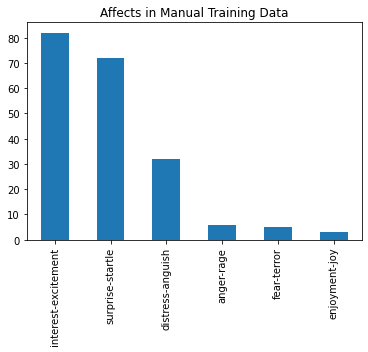

In [ ]:
dfAffects['AFFECT'].value_counts().head(25).plot(kind='bar', title='Affects in Manual Training Data')